In order to be able to train and test the data to predict a player's fantasy points, let's first start by adding a column that reprisents the target variable, aka the following weeks total points for that player, given the current week's stats for that player.

In [11]:
import pandas as pd
import numpy as np

raw = pd.read_csv('top500histories', index_col=0)

In [12]:
raw.columns

Index(['assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'element',
       'fixture', 'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'id_', 'sum_points', 'web_name', 'team',
       'sum_minutes', 'next_week_points', 'team_a_conceded_rank',
       'points_per_90'],
      dtype='object')

In [13]:
raw_sorted = raw.sort_values('round')

In [14]:
df = raw_sorted[['id_', 'web_name', 'round', 'goals_scored', 'assists', 'clean_sheets', 'bps', 'saves', 'minutes', 'sum_points', 'points_per_90', 'next_week_points']]

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [16]:
m = ols('next_week_points ~ goals_scored + assists + clean_sheets + bps + saves + minutes + sum_points + points_per_90',  df[df['round'] <= 15]).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:       next_week_points   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     237.8
Date:                Sun, 12 Jan 2020   Prob (F-statistic):               0.00
Time:                        01:51:47   Log-Likelihood:                -16416.
No. Observations:                7219   AIC:                         3.285e+04
Df Residuals:                    7210   BIC:                         3.291e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3866      0.043      8.932

In [19]:
df['predictions'] = m.predict(df[df['round'] == 16])

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


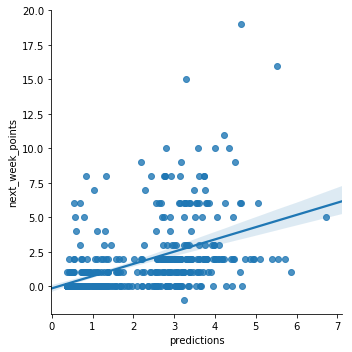

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='predictions', y='next_week_points', data=df)

plt.show()

In [22]:
predictions = df[df['round'] == 16].sort_values('predictions', ascending=False)[['id_', 'predictions']]
predictions.head()

,id_,predictions
15,166,6.723102
243,338,5.870625
77,11,5.718149
98,233,5.554328
119,191,5.528397


In [36]:
predictions.to_csv('predictions', index=False)